<a href="https://colab.research.google.com/github/subiksha-sivakumar/Sparks/blob/main/Task3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **SUBIKSHA SHREE S**
## TASK 3: EXPLORATORY DATA ANALYSIS 

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from plotnine import ggplot,aes,geom_line
!pip install geopandas
import geopandas

     |████████████████████████████████| 1.0MB 5.2MB/s 
     |████████████████████████████████| 15.4MB 194kB/s 
     |████████████████████████████████| 6.6MB 32.2MB/s 


In [ ]:
import geopandas as gpd
!pip install mapclassify
!pip install geoplot
import mapclassify
import geoplot as gplt

In [ ]:
data=pd.read_csv('SampleSuperstore.csv')
data.head(7)

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164
5,Standard Class,Consumer,United States,Los Angeles,California,90032,West,Furniture,Furnishings,48.8600,7,0.00,14.1694
6,Standard Class,Consumer,United States,Los Angeles,California,90032,West,Office Supplies,Art,7.2800,4,0.00,1.9656


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Ship Mode     9994 non-null   object 
 1   Segment       9994 non-null   object 
 2   Country       9994 non-null   object 
 3   City          9994 non-null   object 
 4   State         9994 non-null   object 
 5   Postal Code   9994 non-null   int64  
 6   Region        9994 non-null   object 
 7   Category      9994 non-null   object 
 8   Sub-Category  9994 non-null   object 
 9   Sales         9994 non-null   float64
 10  Quantity      9994 non-null   int64  
 11  Discount      9994 non-null   float64
 12  Profit        9994 non-null   float64
dtypes: float64(3), int64(2), object(8)
memory usage: 1015.1+ KB


In [ ]:
data.describe()

,Postal Code,Sales,Quantity,Discount,Profit
count,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,55190.379428,229.858001,3.789574,0.156203,28.656896
std,32063.693350,623.245101,2.225110,0.206452,234.260108
min,1040.000000,0.444000,1.000000,0.000000,-6599.978000
25%,23223.000000,17.280000,2.000000,0.000000,1.728750
50%,56430.500000,54.490000,3.000000,0.200000,8.666500
75%,90008.000000,209.940000,5.000000,0.200000,29.364000
max,99301.000000,22638.480000,14.000000,0.800000,8399.976000


In [ ]:
data.drop_duplicates(inplace=True)
data.nunique()

Ship Mode          4
Segment            3
Country            1
City             531
State             49
Postal Code      631
Region             4
Category           3
Sub-Category      17
Sales           5825
Quantity          14
Discount          12
Profit          7287
dtype: int64

In [ ]:
data.drop(['Postal Code'],inplace=True,axis=1)

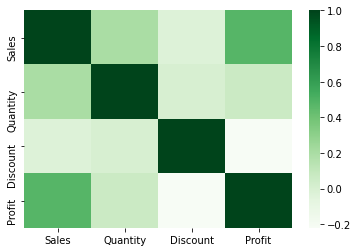

In [ ]:
sns.heatmap(data.corr(),cmap='Greens')
#To check the correlation between the colums.


In [ ]:
data['State'].value_counts

<bound method IndexOpsMixin.value_counts of 0         Kentucky
1         Kentucky
2       California
3          Florida
4          Florida
           ...    
9989       Florida
9990    California
9991    California
9992    California
9993    California
Name: State, Length: 9977, dtype: object>

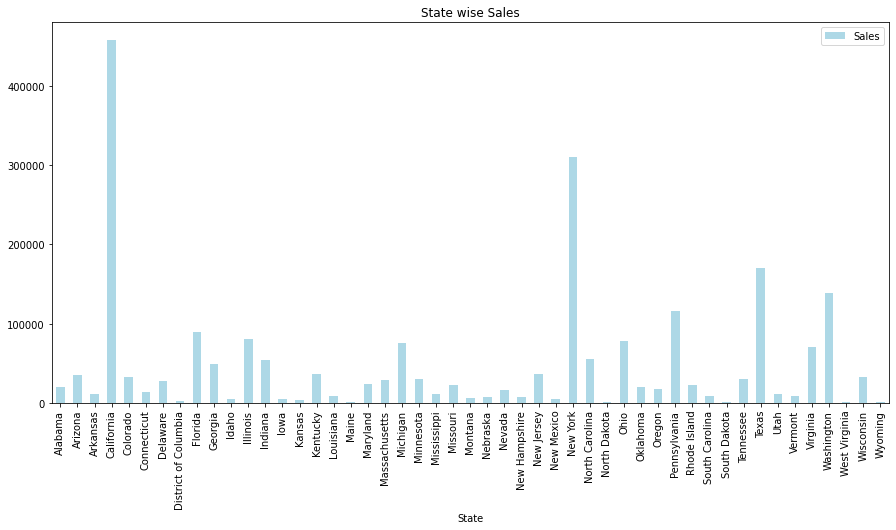

In [ ]:
y=data.groupby(['State']).sum().plot(kind='bar',y='Sales',figsize=(15,7),color='lightblue',title='State wise Sales')


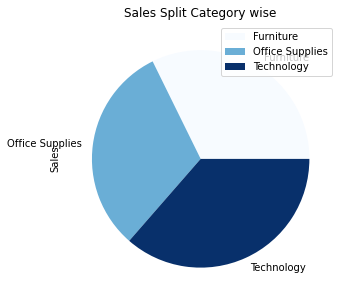

In [ ]:
data.groupby(['Category']).sum().plot(kind='pie',y='Sales',figsize=(5,5),cmap='Blues',title='Sales Split Category wise')

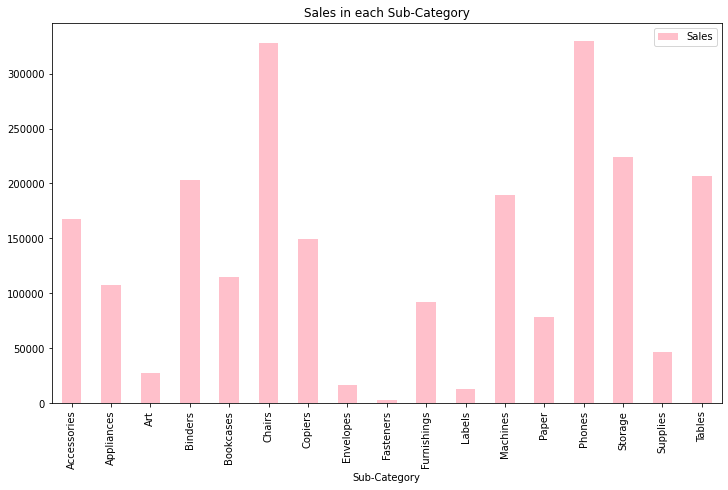

In [ ]:
data.groupby(['Sub-Category']).sum().plot(kind='bar',y='Sales',figsize=(12,7),color='pink',title='Sales in each Sub-Category')

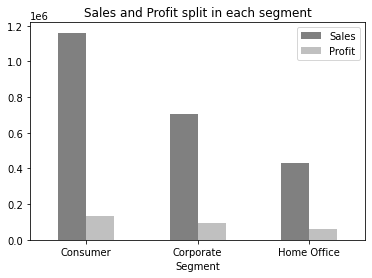

In [ ]:
grouped=data.groupby('Segment').sum()
grouped=grouped[['Sales','Profit']]
ex=grouped.plot.bar(rot=0,color=['Gray','silver'],title='Sales and Profit split in each segment')

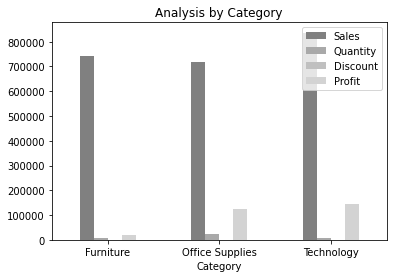

In [ ]:
grouped=data.groupby('Category').sum()
ex=grouped.plot.bar(rot=0,color=['Gray','darkgrey','silver','lightgrey'],title='Analysis by Category')


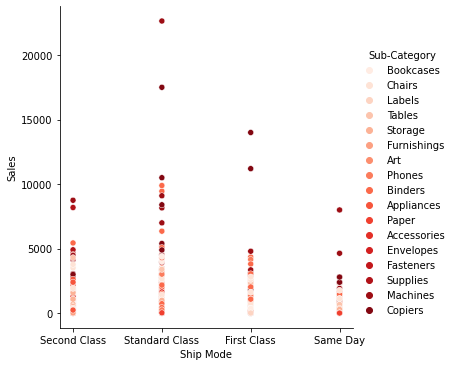

In [ ]:
sns.relplot(hue=data['Sub-Category'],x=data['Ship Mode'],y=data['Sales'],palette='Reds')

/usr/local/lib/python3.7/dist-packages/plotnine/utils.py:1246: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  if pdtypes.is_categorical(arr):
/usr/local/lib/python3.7/dist-packages/plotnine/guides/guides.py:200: PlotnineWarning: Cannot generate legend for the 'fill' aesthetic. Make sure you have mapped a variable to it
  PlotnineWarning)


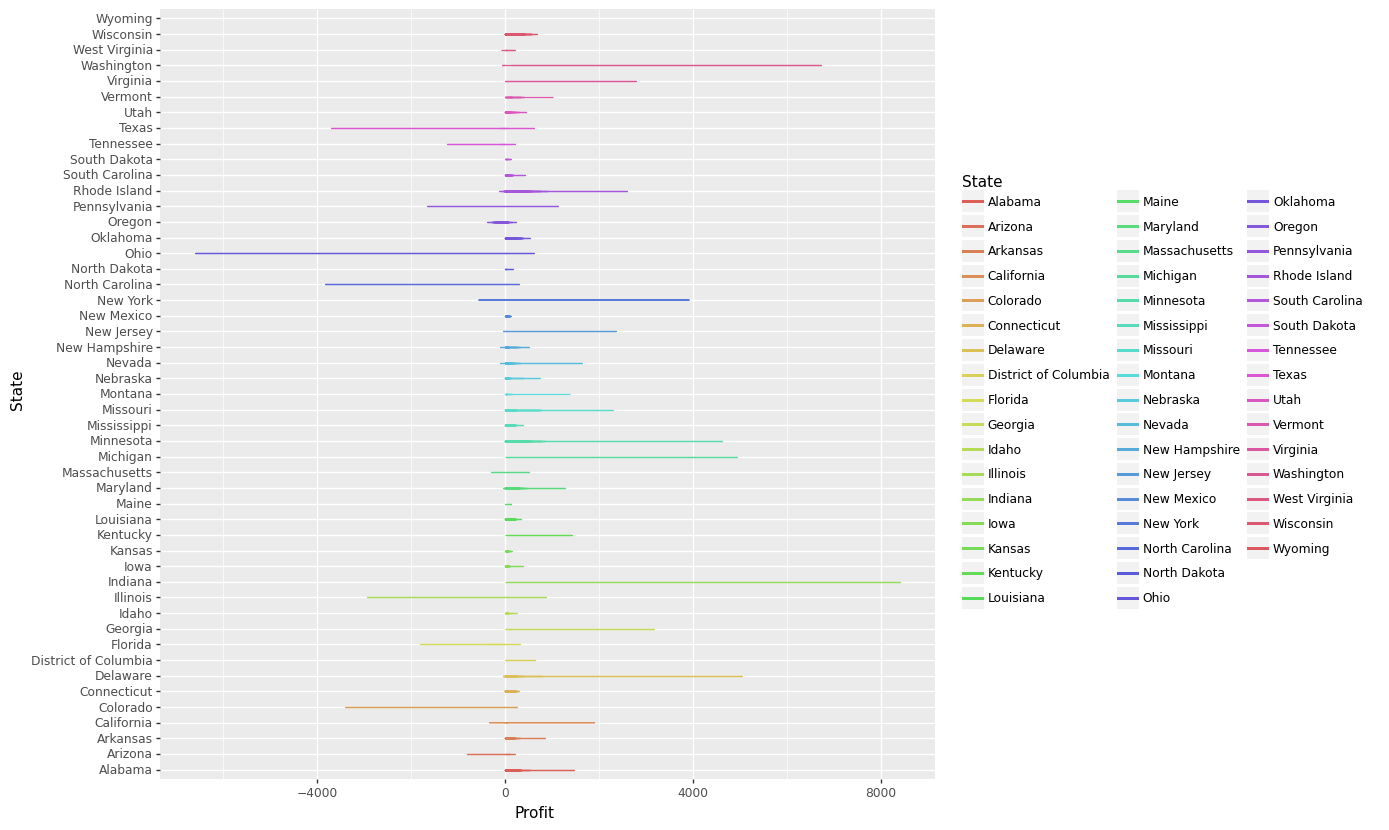

<ggplot: (8760118290889)>

In [ ]:
from plotnine.coords import coord_flip
from plotnine import *
(ggplot(data)+aes(x='State',y='Profit',color='State')+geom_line()+coord_flip()+scale_fill_brewer(type='div',palette='RdGy')+theme(figure_size = (10, 10)))

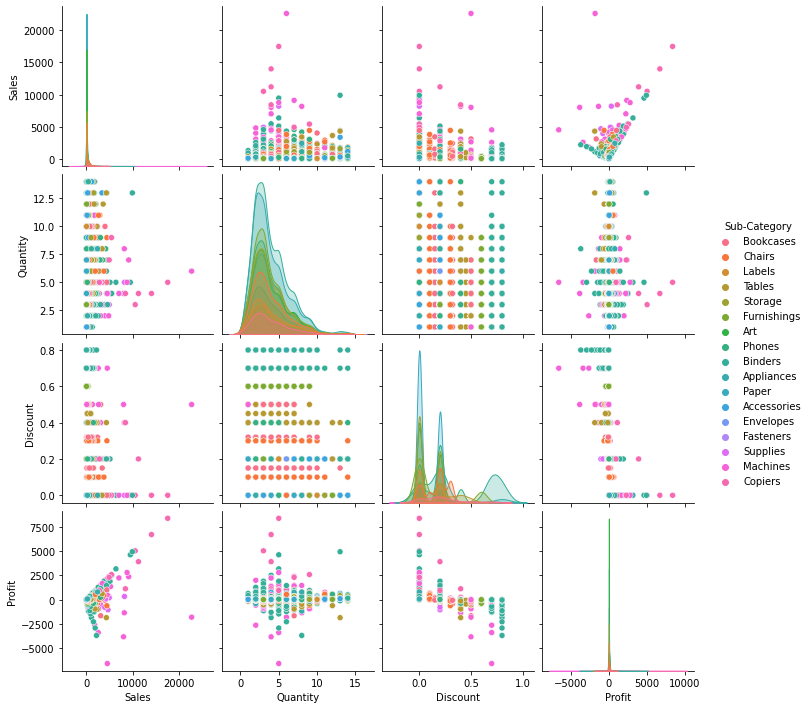

In [ ]:
sns.pairplot(data,hue="Sub-Category")#plotting possible combinations using pairplot

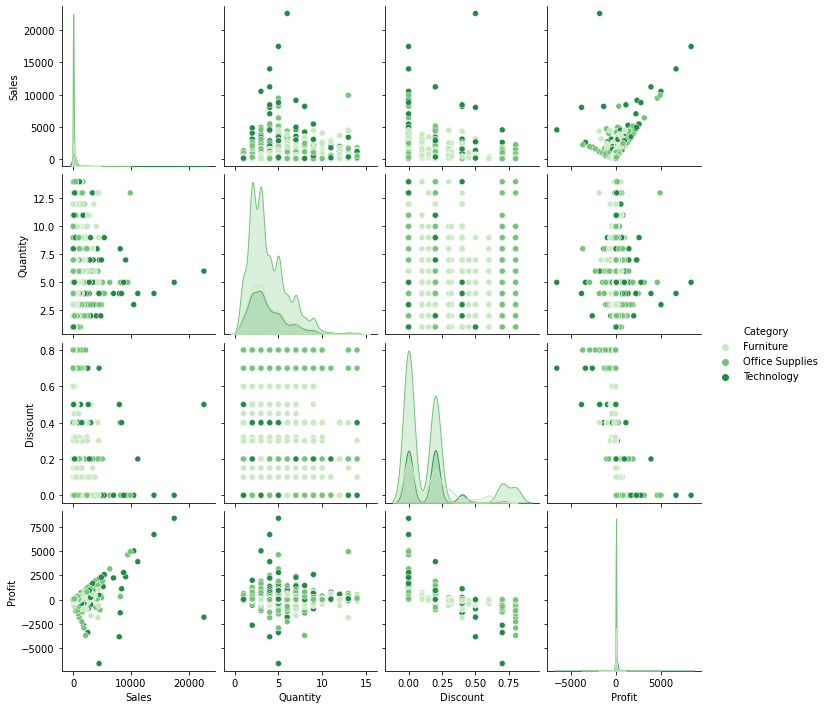

In [ ]:
sns.pairplot(data,hue="Category",palette='Greens')

/usr/local/lib/python3.7/dist-packages/plotnine/utils.py:1246: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  if pdtypes.is_categorical(arr):


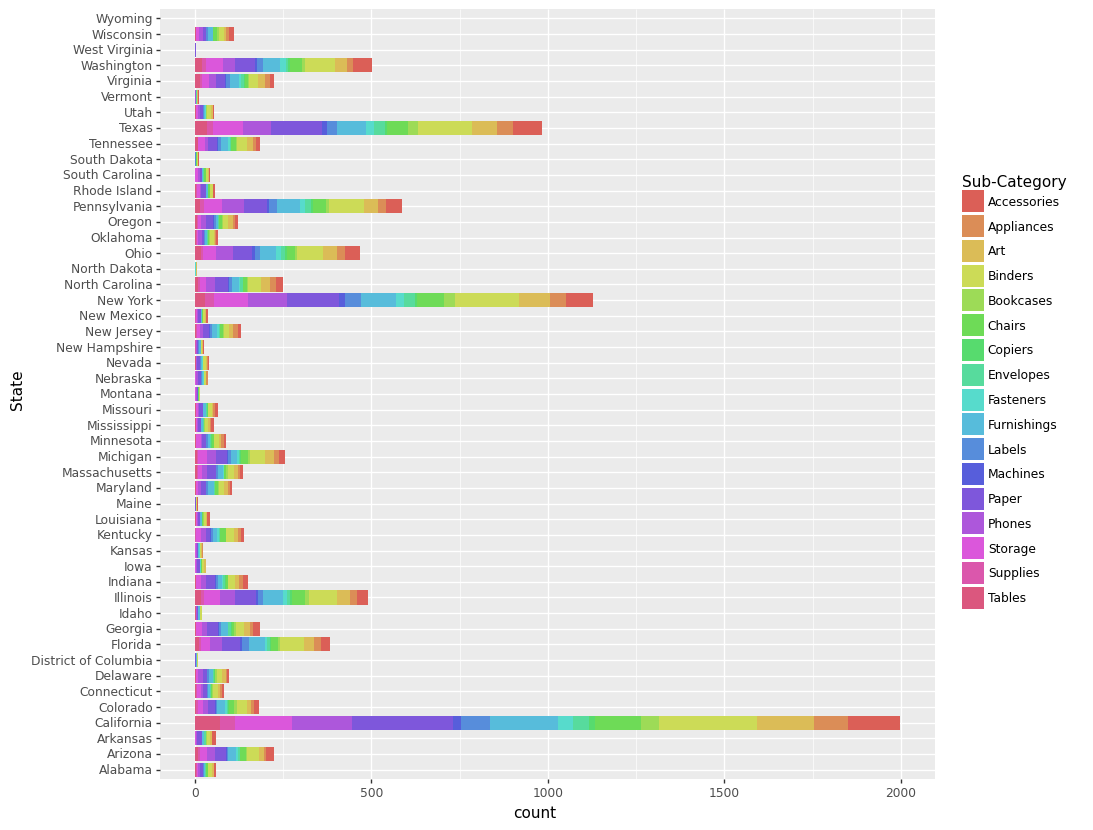

<ggplot: (8760117334389)>

In [ ]:
ggplot(data)+aes(x='State',fill='Sub-Category')+geom_bar()+coord_flip()+theme(figure_size = (10, 10))


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


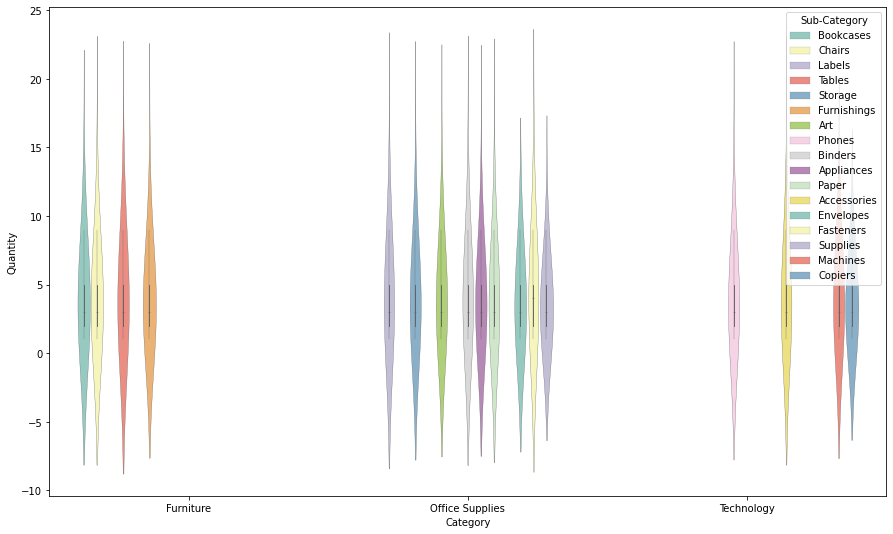

In [ ]:
f, ax = plt.subplots(figsize=(15, 9))#violin plot gives us the idea of mean,inter-quartile range and density
sns.violinplot(data['Category'],data['Quantity'],hue=data['Sub-Category'],sizes=data['Ship Mode'],palette="Set3", bw=2,linewidth=0.3)

/usr/local/lib/python3.7/dist-packages/plotnine/utils.py:1246: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  if pdtypes.is_categorical(arr):


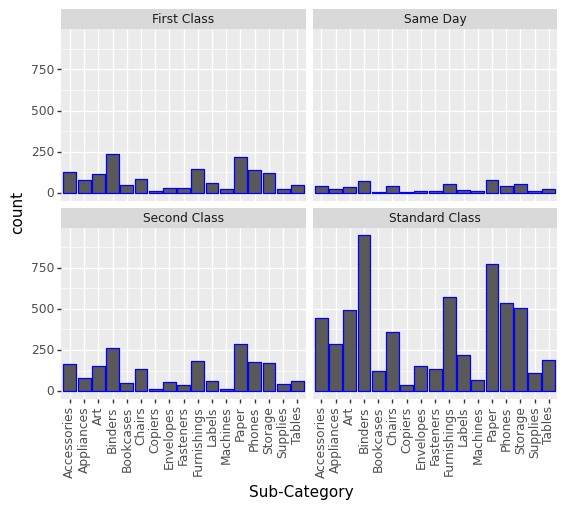

<ggplot: (8760091916469)>

In [ ]:
(ggplot(data)+ aes(x ='Sub-Category', fill='Sales')+geom_bar(color='Blue')+facet_wrap('Ship Mode')+theme(axis_text_x=element_text(angle=90)))

/usr/local/lib/python3.7/dist-packages/plotnine/utils.py:1246: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  if pdtypes.is_categorical(arr):


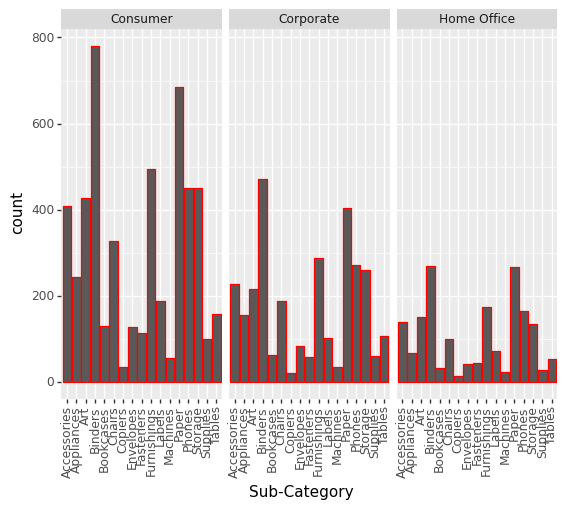

<ggplot: (8760091606421)>

In [ ]:
(ggplot(data)+ aes(x ='Sub-Category',fill='Sales')+geom_bar(color='Red')+facet_wrap('Segment')+theme(axis_text_x=element_text(angle=90)))

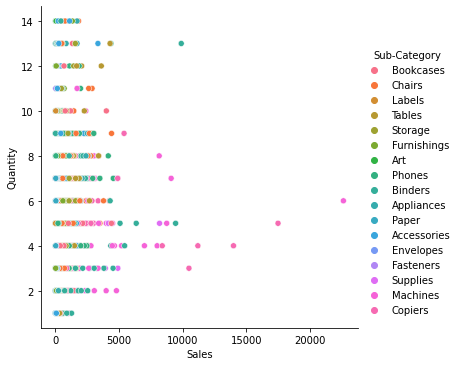

In [ ]:
sns.relplot(x='Sales',y='Quantity',hue='Sub-Category',data=data)

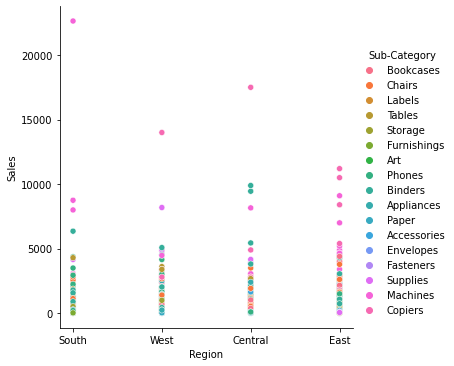

In [ ]:
sns.relplot(x='Region',y='Sales',hue='Sub-Category',data=data)

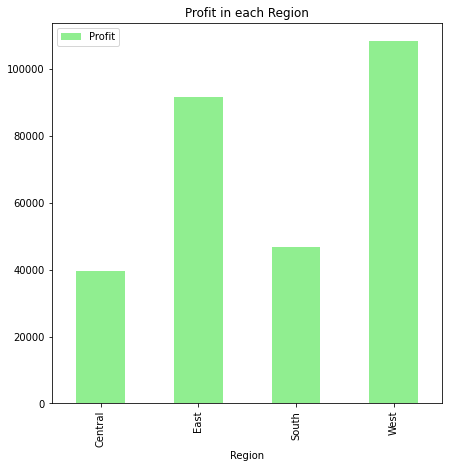

In [ ]:
data.groupby(['Region']).sum().plot(kind='bar',y='Profit',figsize=(7,7),color='lightgreen',title='Profit in each Region')

In [ ]:
usa =gpd.read_file(gplt.datasets.get_path('contiguous_usa'))
usa.set_index('state',inplace=True)
usa.head()

,adm1_code,population,geometry
state,,,
Minnesota,USA-3514,5303925,"POLYGON ((-89.59941 48.01027, -89.48888 48.013..."
Montana,USA-3515,989415,"POLYGON ((-111.19419 44.56116, -111.29155 44.7..."
North Dakota,USA-3516,672591,"POLYGON ((-96.60136 46.35136, -96.53891 46.199..."
Idaho,USA-3518,1567582,"POLYGON ((-111.04973 44.48816, -111.05025 42.0..."
Washington,USA-3519,6724540,"POLYGON ((-116.99807 46.33017, -116.90653 46.1..."


In [ ]:
state_data=data.groupby('State').sum()
state_data

,Sales,Quantity,Discount,Profit
State,,,,
Alabama,19510.6400,256,0.00,5786.8253
Arizona,35282.0010,862,68.00,-3427.9246
Arkansas,11678.1300,240,0.00,4008.6871
California,457576.2715,7649,145.60,76330.7891
Colorado,32108.1180,693,57.60,-6527.8579
Connecticut,13384.3570,281,0.60,3511.4918
Delaware,27451.0690,367,0.60,9977.3748
District of Columbia,2865.0200,40,0.00,1059.5893
Florida,89473.7080,1379,114.65,-3399.3017


In [ ]:
usa['Sales']=state_data['Sales']
usa['Quantity']=state_data['Quantity']
usa['Profit']=state_data['Profit']
usa.head()

,adm1_code,population,geometry,Sales,Quantity,Profit
state,,,,,,
Minnesota,USA-3514,5303925,"POLYGON ((-89.59941 48.01027, -89.48888 48.013...",29863.150,331,10823.1874
Montana,USA-3515,989415,"POLYGON ((-111.19419 44.56116, -111.29155 44.7...",5589.352,56,1833.3285
North Dakota,USA-3516,672591,"POLYGON ((-96.60136 46.35136, -96.53891 46.199...",919.910,30,230.1497
Idaho,USA-3518,1567582,"POLYGON ((-111.04973 44.48816, -111.05025 42.0...",4382.486,64,826.7231
Washington,USA-3519,6724540,"POLYGON ((-116.99807 46.33017, -116.90653 46.1...",138560.810,1871,33368.2375


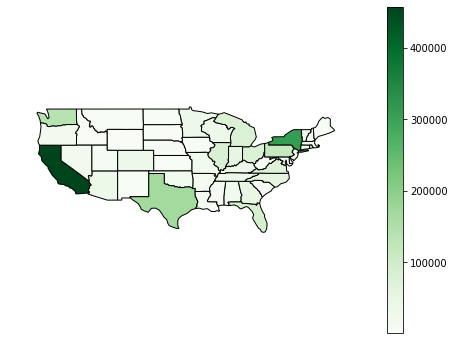

In [ ]:
#usa.plot('Sales',cmap='Purples',figsize=(20,20),legend=True)
gplt.choropleth(usa, hue='Sales', 
    cmap='Greens', legend=True)

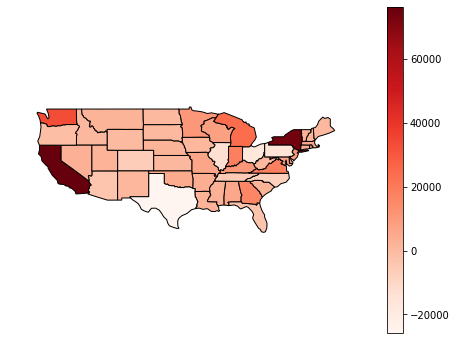

In [ ]:
gplt.choropleth(usa, hue='Profit', 
    cmap='Reds', legend=True)